In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('medical_examination.csv')

In [4]:
data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
data['overweight'] = np.where(data.weight/((data.height/100)**2)>25,1,0)

In [6]:
data['cholesterol'] = np.where(data.cholesterol>1,1,0)
data.gluc = np.where(data.gluc>1,1,0)

In [7]:
c0 = data[data.cardio == 0]
c1 = data[data.cardio == 1]

In [8]:
key = np.array(['active','alco','cholesterol','gluc','overweight','smoke'])

In [9]:
c01 = c0[key].sum().values
c00 = (c0.shape[0] - c0[key].sum()).values

In [10]:
c11 = c1[key].sum().values
c10 = (c1.shape[0] - c1[key].sum()).values

In [11]:
c01

array([28643,  1941,  5691,  4127, 19106,  3240], dtype=int64)

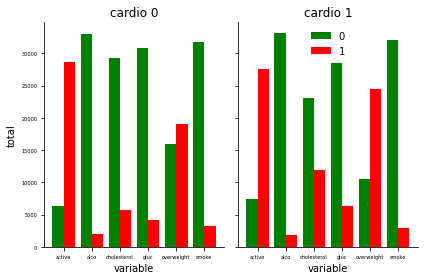

In [22]:


br = np.arange(0,key.shape[0],1)
br1 = br-0.2
br2 = br+0.2

fig,ax = plt.subplots(1, 2, sharex='col', sharey='row')
ax[0].bar(br1,c00,label = '0',color = 'g',width = 0.4)
ax[0].bar(br2,c01,label = '1',color = 'r',width = 0.4)
ax[0].set(ylabel='total',xlabel='variable',title='cardio 0')
ax[0].set(xticks = br, xticklabels = key)
ax[0].tick_params( labelsize=5)
ax[0].spines.top.set_visible(False)
ax[0].spines.right.set_visible(False)

ax[1].bar(br1,c10,label = '0',color = 'g',width = 0.4)
ax[1].bar(br2,c11,label = '1',color = 'r',width = 0.4)
ax[1].tick_params( labelsize=5)
ax[1].set(xticks = br, xticklabels = key)
ax[1].set(xlabel='variable',title='cardio 1')
ax[1].legend(frameon=False)
fig.tight_layout()
ax[1].spines.top.set_visible(False)
ax[1].spines.right.set_visible(False)

In [13]:
fig.savefig('new.jpeg',dpi=2000,transparent=False,bbox_inches='tight')

In [14]:
import seaborn as sns

In [15]:
corr = data.corr().values
#corr = np.round(corr,2)

In [16]:
mask = np.zeros(corr.shape)
mask[np.triu_indices_from(mask)] = True

In [17]:
df = pd.DataFrame(corr,data.keys(),data.keys())

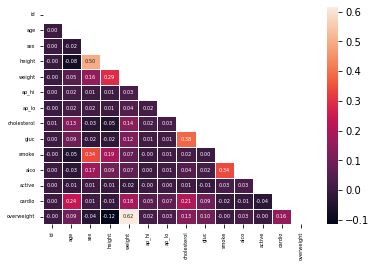

In [192]:
sns.heatmap(df,mask = mask,linewidth=0.9,annot = True,annot_kws={"size":5},cbar=True,fmt='0.2f')
plt.tick_params(labelsize=5)
plt.savefig('heatmap.jpeg',dpi=800)